In [60]:
%matplotlib inline
#Imports

import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns


##Import visualization model

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
##Import model family

from scipy import stats, integrate
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets




df = pd.read_csv('/Users/justinwest/Desktop/Ethiopia_final_female_dataset_new.csv', index_col=0)
df2 = pd.read_csv('/Users/justinwest/Desktop/Ethiopia_final_female_dataset_.csv', index_col=0)
df.describe()


df.head()





# load statsmodels as alias ``sm``
import statsmodels.formula.api as sm




In [62]:
df.describe()

,age_of_hh_member,marital_status,hours_per_week_agg,hours_per_week_non_agg,bank_account,fertilzer,Use_Manure_Fertilizer,Type_of_Planting,Amount_of_field_planted,chemical_fertilizers_used,...,region_code_6,region_code_7,region_code_12,region_code_13,region_code_14,hired_men,hired_women,female,harvest_crop_from_field,education
count,9874.000000,9874.000000,605.000000,605.000000,9874.000000,9874.0,9874.000000,9874.000000,3416.000000,9874.000000,...,9874.000000,9874.000000,9874.000000,9874.000000,9874.0,9874.000000,9874.000000,9874.0,9874.0,9874.000000
mean,5.065728,0.042840,20.904132,15.669421,0.001519,1.0,0.409966,1.345959,4.740340,0.842921,...,0.021673,0.182803,0.000101,0.165080,0.0,0.187665,0.045777,1.0,0.0,0.035548
std,7.783563,0.202506,15.815599,15.689658,0.038949,0.0,0.491852,0.475704,2.419702,0.363894,...,0.145621,0.386525,0.010064,0.371272,0.0,0.390464,0.209011,0.0,0.0,0.185169
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000
25%,2.000000,0.000000,8.000000,6.000000,0.000000,1.0,0.000000,1.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000
50%,4.000000,0.000000,20.000000,10.000000,0.000000,1.0,0.000000,1.000000,5.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000
75%,5.000000,0.000000,28.000000,18.000000,0.000000,1.0,1.000000,2.000000,7.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.000000
max,68.000000,1.000000,84.000000,84.000000,1.000000,1.0,1.000000,2.000000,9.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.0,0.0,1.000000


In [8]:
## Original OLS on DF that includes 0s##


import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="hours_per_week_agg ~ age_of_hh_member + bank_account + marital_status  + Credit_Services + extension_program + chemical_fertilizers_used + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_crops_2_sell + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field + household_size + region_code_1 + region_code_2 + region_code_3 + region_code_4 + region_code_5 + region_code_6 + region_code_7 + region_code_12 + region_code_13 + region_code_14 + hired_men + hired_women + female + harvest_crop_from_field + amt_of_crop_harvest + value_of_Crop_sales + household_size + education", data=df2).fit()

est.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     hours_per_week_agg   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     93.22
Date:                Thu, 14 Dec 2017   Prob (F-statistic):               0.00
Time:                        05:37:35   Log-Likelihood:            -1.1225e+05
No. Observations:               28045   AIC:                         2.246e+05
Df Residuals:                   28017   BIC:                         2.248e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.8132      0.591      1.375      0.169      -0.346       1.972
age_of_hh_member                    0.0879      0.006     14.039      0.000       0.076       0.100
bank_account                        4.7912      0.360     13.311      0.000       4.086       5.497
marital_status                     -2.1712      0.204    -10.623      0.000      -2.572      -1.771
Credit_Services                    -3.0301      0.200    -15.132      0.000      -3.423      -2.638
extension_program                   3.0513      0.217     14.064      0.000       2.626       3.477
chemical_fertilizers_used          -2.2058      0.234     -9.444      0.000      -2.664      -1.748
advisory_Services                   2.7015      0.231     11.711      0.000       2.249       3.154
Crop_Rotation                       2.7312      0.422      6.467      0.000       1.903       3.559
who_in_charge_of_crops             -0.7642      0.418     -1.828      0.068      -1.584       0.055
who_decides_crops_2_sell            0.7501      0.400      1.874      0.061      -0.035       1.535
who_decides_on_use_of_income       -5.2030      0.326    -15.965      0.000      -5.842      -4.564
who_buys_agg_supplies               2.0183      0.450      4.482      0.000       1.136       2.901
did_you_harvest_crop_from_field     0.8132      0.591      1.375      0.169      -0.346       1.972
household_size                     -0.2174      0.020    -10.670      0.000      -0.257      -0.178
region_code_1                       2.4667      1.726      1.429      0.153      -0.916       5.850
region_code_2                      14.2075      3.590      3.958      0.000       7.171      21.244
region_code_3                       2.9195      1.710      1.707      0.088      -0.432       6.271
region_code_4                       5.9714      1.711      3.490      0.000       2.618       9.325
region_code_5                      10.7797      3.335      3.232      0.001       4.243      17.316
region_code_6                      -0.0217      1.724     -0.013      0.990      -3.401       3.358
region_code_7                       3.7765      1.714      2.203      0.028       0.416       7.137
region_code_12                      7.6195      2.948      2.585      0.010       1.842      13.397
region_code_13                     -3.6342      1.895     -1.918      0.055      -7.348       0.080
region_code_14                   3.458e-14   9.24e-15      3.742      0.000    1.65e-14    5.27e-14
hired_men                           1.4979      0.296      5.061      0.000       0.918       2.078
hired_women                        -0.7887      0.429     -1.837      0.066      -1.630       0.053
female                              0.8132      0.591      1.375      0.169      -0

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


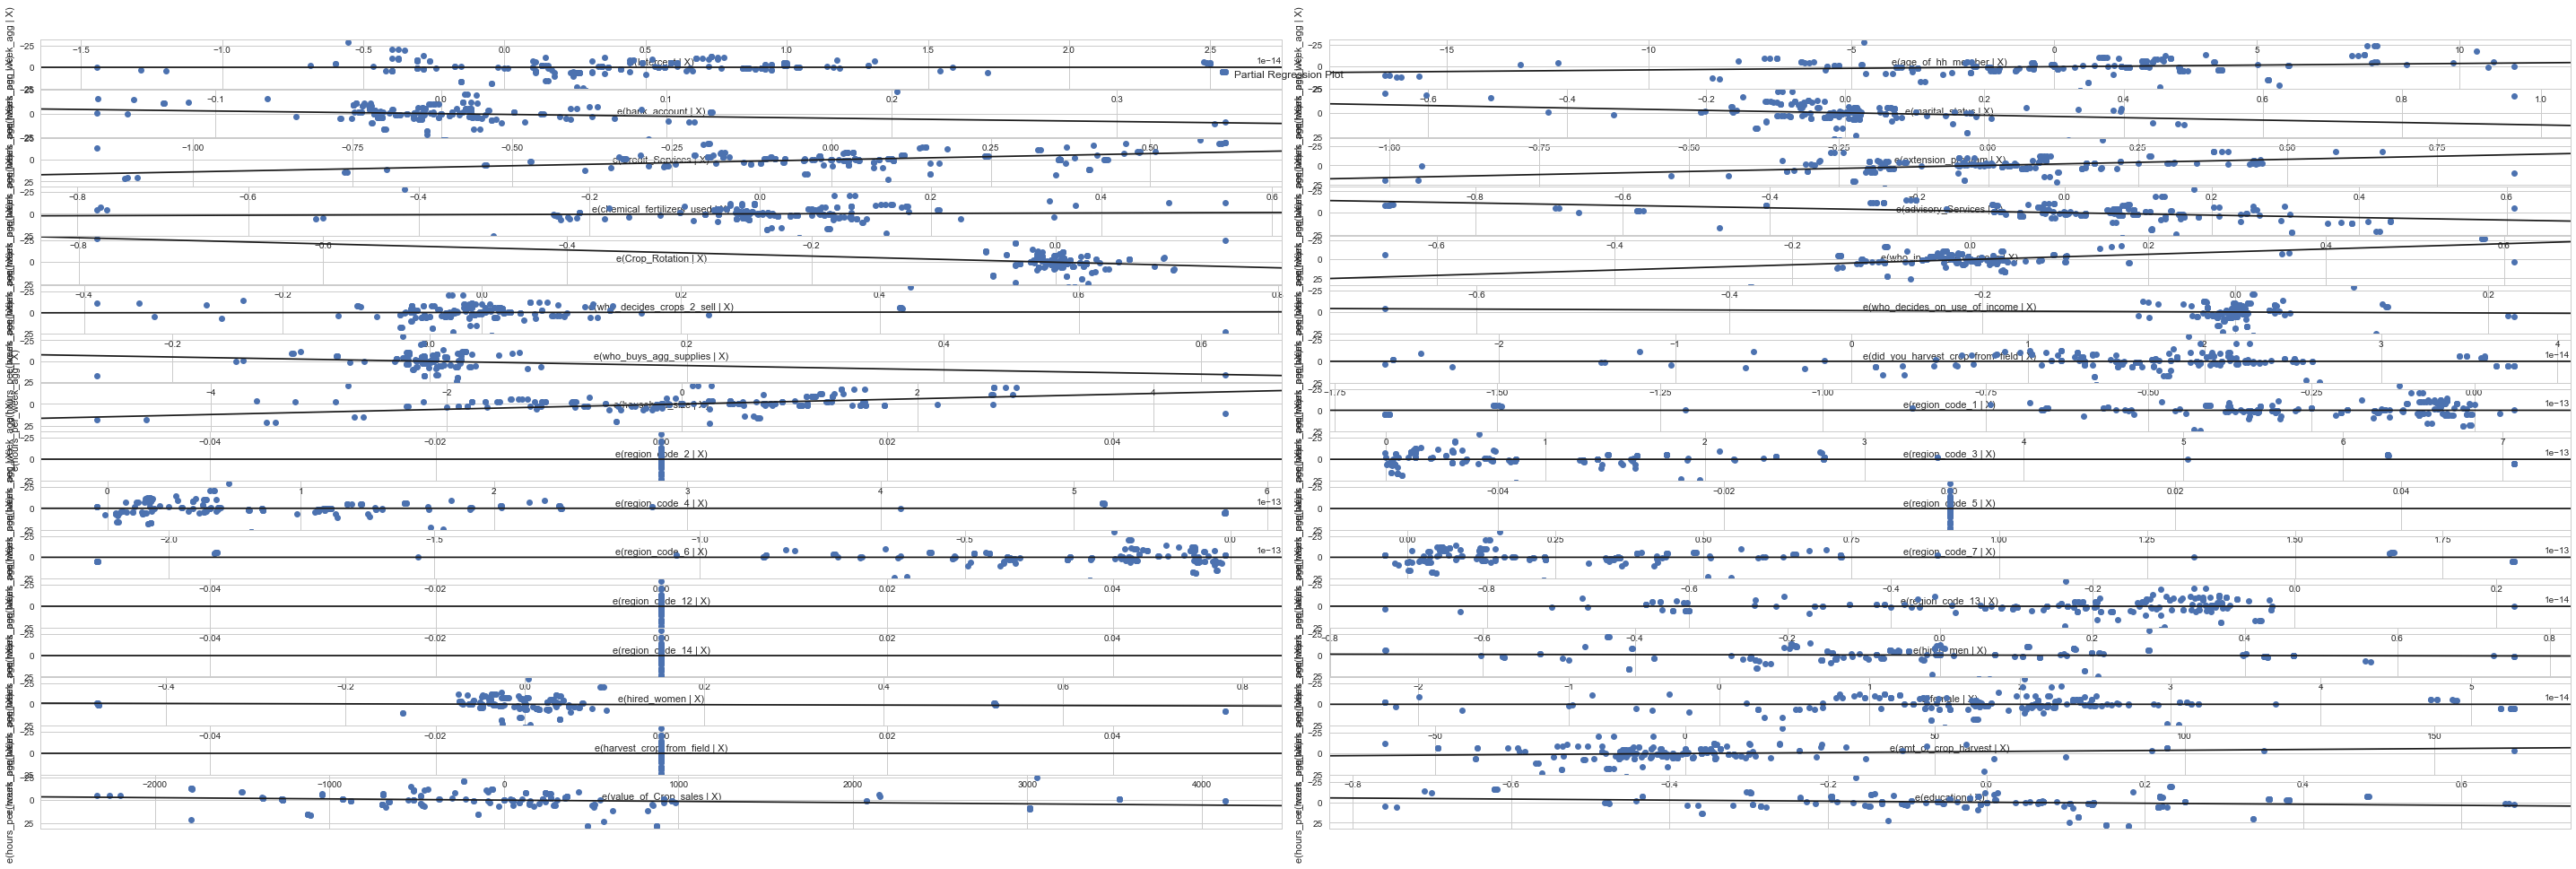

In [39]:
### Original ols This was ran on the CSV after I removed the 0s for hours_per_week_agg###

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="hours_per_week_agg ~ age_of_hh_member + bank_account + marital_status  + Credit_Services + extension_program + chemical_fertilizers_used + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_crops_2_sell + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field + household_size + region_code_1 + region_code_2 + region_code_3 + region_code_4 + region_code_5 + region_code_6 + region_code_7 + region_code_12 + region_code_13 + region_code_14 + hired_men + hired_women + female + harvest_crop_from_field + amt_of_crop_harvest + value_of_Crop_sales + household_size + education", data=df).fit()

est.summary()


fig = plt.figure(figsize=(40,12))
fig = sm.graphics.plot_partregress_grid(est, fig=fig)

In [13]:
print('Parameters: ', est.params)
print('Standard errors: ', est.bse)
print('Predicted values: ', est.predict())

Parameters:  Intercept                          -1.193327
bank_account                        6.903989
marital_status                      2.567845
advisory_Services                   9.224188
Crop_Rotation                      -4.041450
who_in_charge_of_crops            -15.612335
who_decides_on_use_of_income        9.676180
who_buys_agg_supplies              11.294557
did_you_harvest_crop_from_field    -2.353887
region_code_1                      15.078767
region_code_3                      18.798046
region_code_4                      21.114014
region_code_6                       8.802424
region_code_7                      15.880656
region_code_13                     26.994923
hired_women                        -3.472422
female                             -1.193327
dtype: float64
Standard errors:  Intercept                          2.824033
bank_account                       3.636446
marital_status                     1.431290
advisory_Services                  1.675435
Crop_Rotation

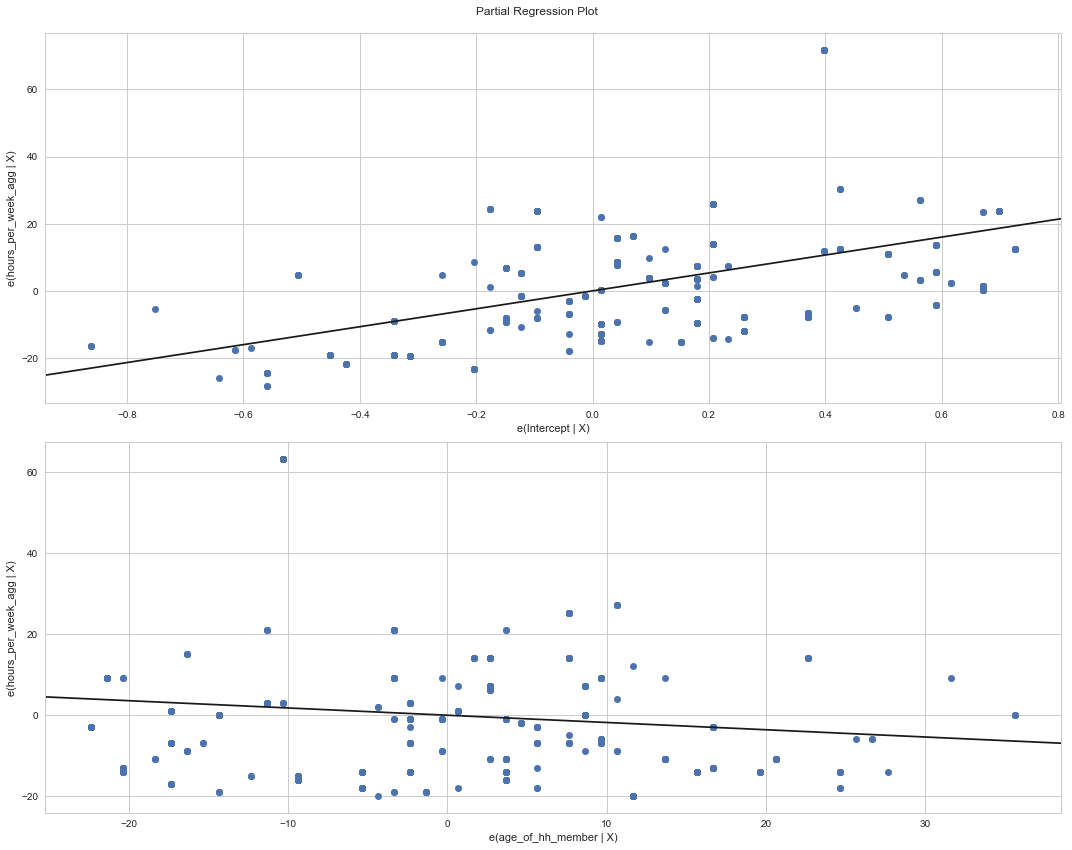

In [59]:
### Original ols This was ran on the CSV after I removed the 0s for hours_per_week_agg###

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="hours_per_week_agg ~ age_of_hh_member", data=df).fit()

est.summary()


fig = plt.figure(figsize=(15,12))
fig = sm.graphics.plot_partregress_grid(est, fig=fig)

In [10]:
## significant OLS variables from first run##

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="hours_per_week_agg ~ age_of_hh_member + bank_account + marital_status  + Credit_Services + extension_program + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field +  region_code_1 + region_code_3 + region_code_4 + region_code_6 + region_code_7 + region_code_13 + hired_men + hired_women + female + education", data=df).fit()

est.summary()
x=est.summary()


print(x)
with open('/Users/justinwest/Desktop/Regression_Refined.txt','w') as fout:
        
    print(x,file=fout)

                            OLS Regression Results                            
Dep. Variable:     hours_per_week_agg   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     20.32
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           1.82e-54
Time:                        05:40:48   Log-Likelihood:                -2368.6
No. Observations:                 605   AIC:                             4779.
Df Residuals:                     584   BIC:                             4872.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

                            OLS Regression Results                            
Dep. Variable:     hours_per_week_agg   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.20
Date:                Thu, 14 Dec 2017   Prob (F-statistic):           4.32e-48
Time:                        06:49:03   Log-Likelihood:                -2392.8
No. Observations:                 605   AIC:                             4818.
Df Residuals:                     589   BIC:                             4888.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

ValueError: x and y must have same first dimension, but have shapes (9874, 1) and (605,)

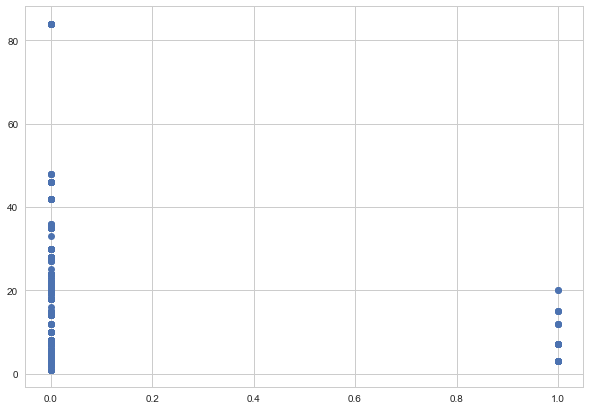

In [56]:
## significant OLS variables from first run##

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="hours_per_week_agg ~ bank_account + marital_status + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field +  region_code_1 + region_code_3 + region_code_4 + region_code_6 + region_code_7 + region_code_13 + hired_women + female", data=df).fit()

est.summary()
x=est.summary()


print(x)
with open('/Users/justinwest/Desktop/Regression_Refined_curious.txt','w') as fout:
        
    print(x,file=fout)
    
    

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# predictor variable
x = df[['region_code_6']]
# dependent variable
y = df[['hours_per_week_agg']]

# retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(est)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, est.fittedvalues, 'g--.', label="OLS")
# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');

In [10]:
## significant OLS variables from first run##

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="amt_of_crop_harvest ~ age_of_hh_member + bank_account + marital_status  + Credit_Services + extension_program + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field +  region_code_1 + region_code_3 + region_code_4 + region_code_6 + region_code_7 + region_code_13 + hired_men + hired_women + female + harvest_crop_from_field + hours_per_week_agg + value_of_Crop_sales + education", data=df).fit()

est.summary()

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# use figsize to adjust size, and pass in to plot_regress_exog
fig = plt.figure(figsize=(15,8))

# pass in the model as the first parameter, then specify the 
# predictor variable we want to analyze
fig = sm.graphics.plot_regress_exog(housing_model, "total_unemployed", fig=fig)

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [56]:
## significant OLS variables from first run##

import patsy
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf
    
est = smf.ols(formula="amt_of_crop_harvest ~ age_of_hh_member + bank_account + marital_status  + Credit_Services + extension_program + advisory_Services + Crop_Rotation + who_in_charge_of_crops + who_decides_on_use_of_income + who_buys_agg_supplies + did_you_harvest_crop_from_field +  region_code_1 + region_code_3 + region_code_4 + region_code_6 + region_code_7 + region_code_13 + hired_men + hired_women + female + harvest_crop_from_field + hours_per_week_agg + value_of_Crop_sales + education", data=df).fit()

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     amt_of_crop_harvest   R-squared:                       0.051
Model:                             OLS   Adj. R-squared:                  0.050
Method:                  Least Squares   F-statistic:                     71.82
Date:                 Sat, 09 Dec 2017   Prob (F-statistic):          1.25e-298
Time:                         12:42:15   Log-Likelihood:            -1.5229e+05
No. Observations:                28045   AIC:                         3.046e+05
Df Residuals:                    28023   BIC:                         3.048e+05
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          17.6893      1.648     10.733      0.000      14.459      20.920
age_of_hh_member                   -0.0015      0.026     -0.057      0.954      -0.052       0.049
bank_account                       -1.0646      1.503     -0.708      0.479      -4.011       1.882
marital_status                     -5.6144      0.851     -6.601      0.000      -7.282      -3.947
Credit_Services                    -3.0234      0.834     -3.623      0.000      -4.659      -1.388
extension_program                 -15.6114      0.812    -19.222      0.000     -17.203     -14.020
advisory_Services                  11.0132      0.918     11.992      0.000       9.213      12.813
Crop_Rotation                       5.2047      1.714      3.036      0.002       1.844       8.565
who_in_charge_of_crops             -0.7831      1.687     -0.464      0.642      -4.089       2.523
who_decides_on_use_of_income       -6.6634      1.214     -5.489      0.000      -9.043      -4.284
who_buys_agg_supplies              -5.8461      1.813     -3.225      0.001      -9.399      -2.293
did_you_harvest_crop_from_field    17.6893      1.648     10.733      0.000      14.459      20.920
region_code_1                     -41.0420      5.024     -8.170      0.000     -50.889     -31.195
region_code_3                     -36.6243      4.954     -7.393      0.000     -46.334     -26.914
region_code_4                     -31.5578      4.923     -6.410      0.000     -41.208     -21.908
region_code_6                     -12.9657      5.038     -2.574      0.010     -22.840      -3.092
region_code_7                     -34.6241      4.967     -6.971      0.000     -44.359     -24.889
region_code_13                    -37.2764      5.755     -6.477      0.000     -48.557     -25.996
hired_men                          -2.6805      1.228     -2.182      0.029      -5.088      -0.273
hired_women                        -6.1208      1.787     -3.426      0.001      -9.623      -2.619
female                             17.6893      1.648     10.733      0.000      14.459      20.920
harvest_crop_from_field         -3.838e-16   1.12e-16     -3.434      0.001   -6.03e-16   -1.65e-16
hours_per_week_agg                 -0.0177      0.025     -0.713      0.476      -0.066       0.031
value_of_Crop_sales                 0.0012      0.000      9.338      0.000       0.001       0.001
education                          -5.4613      0.787     -6.939      0.000      -7.004      -3.919
==============================================================================
Omnibus:                    36357.247   Durbin-Watson:                   0.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8459385.465
Skew:                           7.2

In [9]:
help(est)

Help on RegressionResultsWrapper in module statsmodels.regression.linear_model object:

class RegressionResultsWrapper(statsmodels.base.wrapper.ResultsWrapper)
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Returns the confidence interval of the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The `alpha` level for the confidence interval.
 |          ie., The default `alpha` = .05 returns a 95% confidence interval.
 |      cols : array-like, optional
 |          `cols` specifies which confidence intervals to return
 |      
 |      Notes
 |      -----
 |      The confidence

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Fuzz46/Team-PP-Capstone/master/Ethiopia_final_female_dataset.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2e9afbe0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1c333df1d0>]], dtype=object)

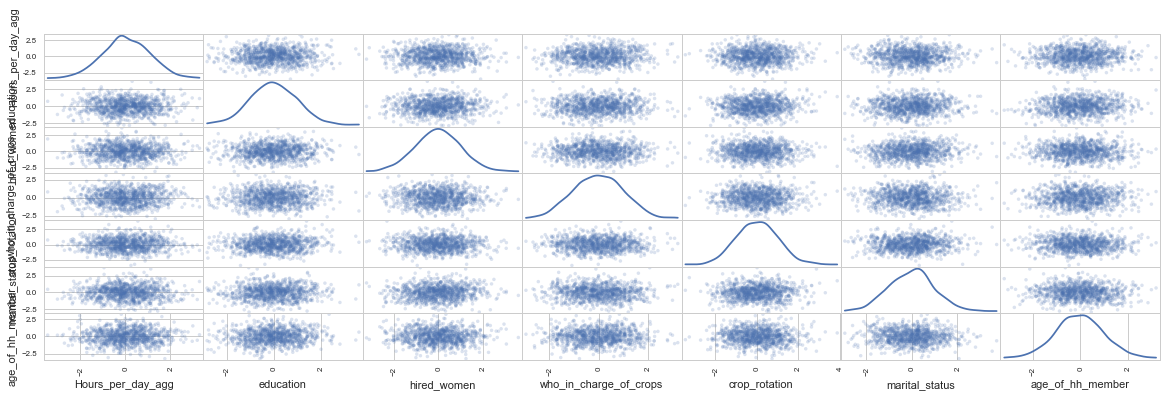

In [52]:
#this is a binary variable for hours ##

df = 

from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 7), columns=['Hours_per_day_agg','education','hired_women', 'who_in_charge_of_crops', 'crop_rotation', 'marital_status', 'age_of_hh_member'])

scatter_matrix(df, alpha=0.2, figsize=(20, 6), diagonal='kde')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=-0.5, right=-0.5
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=-0.5, top=-0.5
  'bottom=%s, top=%s') % (bottom, top))


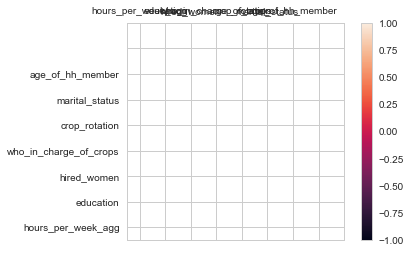

In [42]:
import matplotlib.pyplot as plt
import pandas
import numpy

names = ['hours_per_week_agg','education','household_size', 'who_in_charge_of_crops', 'crop_rotation', 'marital_status', 'age_of_hh_member']
data = pd.read_csv('/Users/justinwest/Desktop/Ethiopia_final_female_dataset.csv', names=names)
correlations = data.corr()


fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [41]:
from pandas.plotting import andrews_curves

data = pd.read_csv('/Users/justinwest/Desktop/Ethiopia_final_female_dataset.csv')

plt.figure()


andrews_curves(data, 'hours_per_week_agg','education','who_in_charge_of_crops', 'age_of_hh_member')

ValueError: invalid literal for int() with base 10: 'who_in_charge_of_crops'